# Plantilla: Proyecto
## Tema 2: Clasificación de barrios en función de su tipología.
Documento plantilla para el proyecto con los imports de las librerias más importantes.

In [1]:
import nltk                      # Natural Language Toolkit
import scrapy                    # Web scraping  
import requests                  # HTTP requests
import selenium                  # Web automation
import numpy as np               # Numerical computing
import pandas as pd              # Data manipulation
import seaborn as sns            # Data visualization
import tensorflow as tf          # Machine learning
import matplotlib.pyplot as plt  # Data visualization

from bs4 import BeautifulSoup    # HTML parsing

In [2]:
# Carga la página P.19.1 del documento \docs_Carlos\Distritos23.xlsx. Las primeras 10 líneas son de encabezado.

%pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [3]:
df_seguridad = pd.read_excel('docs_Carlos/Distritos23.xlsx', sheet_name=' P.19.1', header=8)
# cambiar el nombre de la primera columna que hace de header a 'Distrito':
df_seguridad.rename(columns={'Unnamed: 0':'Distrito'}, inplace=True)
df_seguridad.rename(columns={'Unnamed: 15':'Seguridad'}, inplace=True)
df_seguridad.rename(columns={'Unnamed: 16':'Desviación'}, inplace=True)
df_seguridad.rename(columns={'Unnamed: 17':'Mediana'}, inplace=True)
#eliminar las columans 1 a 14
df_seguridad = df_seguridad.drop(df_seguridad.columns[1:15], axis=1)
df_seguridad = df_seguridad.drop(df_seguridad.columns[2:], axis=1)

df_seguridad['Seguridad'] = df_seguridad['Seguridad']/10
df_seguridad


,Distrito,Seguridad
0,Total,0.675763
1,1. Ciutat Vella,0.715789
2,2. l'Eixample,0.741270
3,3. Extramurs,0.754198
4,4. Campanar,0.699153
5,5. la Saïdia,0.535156
6,6. el Pla del Real,0.745299
7,7. l'Olivereta,0.668462
8,8. Patraix,0.734559
9,9. Jesús,0.672932


In [4]:
df_discrimin = pd.read_excel('docs_Carlos/Distritos23.xlsx', sheet_name=' P.31.1', header=8)
# cambiar el nombre de la primera columna que hace de header a 'Distrito':
df_discrimin.rename(columns={'Unnamed: 0':'Distrito'}, inplace=True)
df_discrimin.rename(columns={' Sí':'Discriminacion'}, inplace=True)
#elimino la última columna que no tiene datos
df_discrimin = df_discrimin.iloc[:, :-1]
df_discrimin = df_discrimin.drop(df_discrimin.columns[2:], axis=1)
df_discrimin['Discriminacion'] = df_discrimin['Discriminacion']/100
df_discrimin


,Distrito,Discriminacion
0,Total,0.135579
1,1. Ciutat Vella,0.149123
2,2. l'Eixample,0.150794
3,3. Extramurs,0.152672
4,4. Campanar,0.152542
5,5. la Saïdia,0.109375
6,6. el Pla del Real,0.136752
7,7. l'Olivereta,0.215385
8,8. Patraix,0.139706
9,9. Jesús,0.067669


In [5]:
df_extranjer = pd.read_excel('docs_Carlos/Distritos23.xlsx', sheet_name=' P.36', header=7)
# cambiar el nombre de la primera columna que hace de header a 'Distrito':
df_extranjer.rename(columns={'Unnamed: 0':'Distrito'}, inplace=True)
# añadir una columna que sea: "true Valencia" y condensar en ella las columnas 2 y 3 en una sola que sume los valores por fila
df_extranjer['Españoles'] = df_extranjer.iloc[:, 1] + df_extranjer.iloc[:, 2] + df_extranjer.iloc[:, 3] + df_extranjer.iloc[:, 4]
# añadir una columna que sea: "Extranjeros" y condensar en ella las columnas 4, 5 y 6 en una sola que sume los valores por fila
df_extranjer['Extranjeros'] = df_extranjer.iloc[:, 5] 
# Eliminar las columnas 2 a 8
df_extranjer = df_extranjer.drop(df_extranjer.columns[1:9], axis=1)
#eliminar columna 1 y 3
df_extranjer = df_extranjer.drop(df_extranjer.columns[1], axis=1)
df_extranjer['Extranjeros'] = df_extranjer['Extranjeros']/100
df_extranjer


,Distrito,Extranjeros
0,Total,0.183847
1,1. Ciutat Vella,0.140351
2,2. l'Eixample,0.055556
3,3. Extramurs,0.152672
4,4. Campanar,0.177966
5,5. la Saïdia,0.242188
6,6. el Pla del Real,0.000000
7,7. l'Olivereta,0.230769
8,8. Patraix,0.308824
9,9. Jesús,0.218045


In [6]:
df_op_politi  = pd.read_excel('docs_Carlos/Distritos23.xlsx', sheet_name=' P.37', header=8)
# cambiar el nombre de la primera columna que hace de header a 'Distrito':
df_op_politi.rename(columns={'Unnamed: 0':'Distrito'}, inplace=True)
df_op_politi.rename(columns={'Unnamed: 14':'Política'}, inplace=True)
df_op_politi.rename(columns={'Unnamed: 15':'Desviación'}, inplace=True)
df_op_politi.rename(columns={'Unnamed: 16':'Mediana'}, inplace=True)
#eliminar las columans 1 a 13
df_op_politi = df_op_politi.drop(df_op_politi.columns[1:14], axis=1)
df_op_politi = df_op_politi.drop(df_op_politi.columns[2:], axis=1)
df_op_politi['Política'] = df_op_politi['Política']/10
df_op_politi

,Distrito,Política
0,Total,0.534791
1,1. Ciutat Vella,0.593814
2,2. l'Eixample,0.638938
3,3. Extramurs,0.562037
4,4. Campanar,0.533708
5,5. la Saïdia,0.516071
6,6. el Pla del Real,0.724138
7,7. l'Olivereta,0.476106
8,8. Patraix,0.521774
9,9. Jesús,0.500000


In [7]:
df_s_laboral  = pd.read_excel('docs_Carlos/Distritos23.xlsx', sheet_name=' P.39', header=7)
# cambiar el nombre de la primera columna que hace de header a 'Distrito':
df_s_laboral.rename(columns={'Unnamed: 0':'Distrito'}, inplace=True)
# Remombrar la segunda columna como "Empleados" (acceder a ella por indice)
df_s_laboral.rename(columns={df_s_laboral.columns[1]:'Empleados'}, inplace=True)
df_s_laboral.rename(columns={' Estudiante':'Estudiantes'}, inplace=True)
# Crear columna Extra llamada "parados_b" que sea la suma de las columnas 2 y 3
df_s_laboral['Desempleados'] = df_s_laboral.iloc[:, 2] + df_s_laboral.iloc[:, 3]
#eliminar columnas 2 y 3
df_s_laboral = df_s_laboral.drop(df_s_laboral.columns[2:4], axis=1)
#eliminar columnas 3, 4 5 y 6
df_s_laboral = df_s_laboral.drop(df_s_laboral.columns[3:7], axis=1)
df_s_laboral['Desempleados'] = df_s_laboral['Desempleados']/100
df_s_laboral['Empleados'] = df_s_laboral['Empleados']/100
df_s_laboral['Estudiantes'] = df_s_laboral['Estudiantes']/100
df_s_laboral


#df_extranjer['Españoles'] = df_extranjer.iloc[:, 1] + df_extranjer.iloc[:, 2]

,Distrito,Empleados,Estudiantes,Desempleados
0,Total,0.506947,0.081897,0.077091
1,1. Ciutat Vella,0.570175,0.166667,0.052632
2,2. l'Eixample,0.507937,0.087302,0.055556
3,3. Extramurs,0.534351,0.061069,0.053435
4,4. Campanar,0.516949,0.067797,0.059322
5,5. la Saïdia,0.492188,0.070312,0.078125
6,6. el Pla del Real,0.487179,0.273504,0.034188
7,7. l'Olivereta,0.507692,0.046154,0.092308
8,8. Patraix,0.470588,0.051471,0.095588
9,9. Jesús,0.481203,0.067669,0.090226


In [8]:
df_ingresos = pd.read_excel('docs_Carlos/Distritos23.xlsx', sheet_name=' P.43', header=8)
df_ingresos.rename(columns={'Unnamed: 0':'Distrito'}, inplace=True)

medias = [0, 250, 750, 1250, 2000, 3750, 6000]

# Calcular el valor esperado de los ingresos. Para cada fila, multiplicar cada valor de la columna [i] (a partir de la 1) por el valor de medias[i] y sumarlo
df_ingresos['Ingresos Mes'] = sum([df_ingresos.iloc[:, i] * medias[i]/100 for i in range(1, 7)])

#eliminar las columnas 1 a 10
df_ingresos = df_ingresos.drop(df_ingresos.columns[1:11], axis=1)

# cambiar el valor de la media de la fila 5 por 2100
df_ingresos.iloc[5, 1] = 2100
df_ingresos.iloc[18,1]= 1750



df_ingresos


,Distrito,Ingresos Mes
0,Total,1875.070412
1,1. Ciutat Vella,2741.228070
2,2. l'Eixample,1908.730159
3,3. Extramurs,2022.900763
4,4. Campanar,993.644068
5,5. la Saïdia,2100.000000
6,6. el Pla del Real,2525.641026
7,7. l'Olivereta,2275.000000
8,8. Patraix,3200.367647
9,9. Jesús,1979.323308


In [9]:

df_ingresos_rel = df_ingresos.copy()
df_ingresos_rel['Ingresos Mes REL'] = df_ingresos_rel['Ingresos Mes']/10000
df_ingresos_rel.drop(df_ingresos_rel.columns[1], axis=1, inplace=True)
df_ingresos_rel

,Distrito,Ingresos Mes REL
0,Total,0.187507
1,1. Ciutat Vella,0.274123
2,2. l'Eixample,0.190873
3,3. Extramurs,0.202290
4,4. Campanar,0.099364
5,5. la Saïdia,0.210000
6,6. el Pla del Real,0.252564
7,7. l'Olivereta,0.227500
8,8. Patraix,0.320037
9,9. Jesús,0.197932


In [10]:
#exportar el dataframe df_ingresos a un archivo csv
df_ingresos.to_csv('docs_Carlos/df_ingresos.csv', index=False)


In [11]:
# Porcentaje de poblacción que lleva viviendo en el mismo distrito más de 5 años

df_permanencia = pd.read_excel('docs_Carlos/Distritos23.xlsx', sheet_name=' P.0', header=7)
df_permanencia.rename(columns={'Unnamed: 0':'Distrito'}, inplace=True)
df_permanencia.rename(columns={' Más de 5 años':'AntRes_5y'}, inplace=True)

#eliminar las columnas 1 a 10
df_permanencia = df_permanencia.drop(df_permanencia.columns[1:4], axis=1)
df_permanencia = df_permanencia.drop(df_permanencia.columns[2:], axis=1)
df_permanencia['AntRes_5y'] = df_permanencia['AntRes_5y']/100
df_permanencia



,Distrito,AntRes_5y
0,Total,0.765354
1,1. Ciutat Vella,0.684211
2,2. l'Eixample,0.857143
3,3. Extramurs,0.778626
4,4. Campanar,0.694915
5,5. la Saïdia,0.804688
6,6. el Pla del Real,0.649573
7,7. l'Olivereta,0.776923
8,8. Patraix,0.676471
9,9. Jesús,0.812030


In [12]:
df_satisfacc = pd.read_excel('docs_Carlos/Distritos23.xlsx', sheet_name=' P.3', header=8)
df_satisfacc.rename(columns={'Unnamed: 0':'Distrito'}, inplace=True)
df_satisfacc.rename(columns={'Unnamed: 15':'Satisfaccion'}, inplace=True)

df_satisfacc = df_satisfacc.drop(df_satisfacc.columns[1:15], axis=1)
df_satisfacc = df_satisfacc.drop(df_satisfacc.columns[2:], axis=1)
df_satisfacc['Satisfaccion'] = df_satisfacc['Satisfaccion']/10
df_satisfacc


,Distrito,Satisfaccion
0,Total,0.821059
1,1. Ciutat Vella,0.791228
2,2. l'Eixample,0.796032
3,3. Extramurs,0.835115
4,4. Campanar,0.845763
5,5. la Saïdia,0.896094
6,6. el Pla del Real,0.747863
7,7. l'Olivereta,0.845385
8,8. Patraix,0.757353
9,9. Jesús,0.841353


In [13]:
df_pr_situ_econo = pd.read_excel('docs_Carlos/Distritos23.xlsx', sheet_name='P.6', header=7)

df_pr_situ_econo.rename(columns={'Unnamed: 0':'Distrito'}, inplace=True)
#cambiar nombre de la columna 1 a 'Buena Situación económica'
df_pr_situ_econo.rename(columns={'La mala situación económica y la inflación':'Precariedad Econo'}, inplace=True)
df_pr_situ_econo = df_pr_situ_econo.drop(df_pr_situ_econo.columns[2:], axis=1)

df_pr_situ_econo['Precariedad Econo'] = df_pr_situ_econo['Precariedad Econo']/100
df_pr_situ_econo

,Distrito,Precariedad Econo
0,Total,0.166817
1,1. Ciutat Vella,0.149123
2,2. l'Eixample,0.119048
3,3. Extramurs,0.091603
4,4. Campanar,0.161017
5,5. la Saïdia,0.265625
6,6. el Pla del Real,0.085470
7,7. l'Olivereta,0.184615
8,8. Patraix,0.117647
9,9. Jesús,0.180451


In [14]:
df_pr_acceso_casa = pd.read_excel('docs_Carlos/Distritos23.xlsx', sheet_name='P.6', header=7)

df_pr_acceso_casa.rename(columns={'Unnamed: 0':'Distrito'}, inplace=True)
df_pr_acceso_casa.rename(columns={'El acceso a la vivienda / escasa oferta / precio alquiler':'Prob Vivienda'}, inplace=True)
df_pr_acceso_casa = df_pr_acceso_casa.drop(df_pr_acceso_casa.columns[1:3], axis=1)
df_pr_acceso_casa = df_pr_acceso_casa.drop(df_pr_acceso_casa.columns[2:], axis=1)
df_pr_acceso_casa['Prob Vivienda'] = df_pr_acceso_casa['Prob Vivienda']/100
df_pr_acceso_casa

,Distrito,Prob Vivienda
0,Total,0.070282
1,1. Ciutat Vella,0.096491
2,2. l'Eixample,0.015873
3,3. Extramurs,0.038168
4,4. Campanar,0.118644
5,5. la Saïdia,0.031250
6,6. el Pla del Real,0.000000
7,7. l'Olivereta,0.092308
8,8. Patraix,0.095588
9,9. Jesús,0.075188


In [15]:
df_recogida_basura = pd.read_excel('docs_Carlos/Distritos23.xlsx', sheet_name=' P.7.1.1', header=9)  
df_recogida_basura.rename(columns={'Unnamed: 0':'Distrito'}, inplace=True)
df_recogida_basura.rename(columns={'Unnamed: 15':'Limpieza'}, inplace=True)
df_recogida_basura = df_recogida_basura.drop(df_recogida_basura.columns[1:15], axis=1)
df_recogida_basura = df_recogida_basura.drop(df_recogida_basura.columns[2:], axis=1)
df_recogida_basura['Limpieza'] = df_recogida_basura['Limpieza']/10
df_recogida_basura

,Distrito,Limpieza
0,Total,0.573540
1,1. Ciutat Vella,0.531579
2,2. l'Eixample,0.622222
3,3. Extramurs,0.586260
4,4. Campanar,0.599153
5,5. la Saïdia,0.382031
6,6. el Pla del Real,0.644444
7,7. l'Olivereta,0.636923
8,8. Patraix,0.503676
9,9. Jesús,0.642105


In [16]:
df_trafico = pd.read_excel('docs_Carlos/Distritos23.xlsx', sheet_name=' P.15.1', header=8)

df_trafico.rename(columns={'Unnamed: 0':'Distrito'}, inplace=True)
df_trafico.rename(columns={' Más de una vez':'Frec Acc Coche'}, inplace=True)
df_trafico = df_trafico.drop(df_trafico.columns[2:], axis=1)
df_trafico['Frec Acc Coche'] = df_trafico['Frec Acc Coche']/100
df_trafico



,Distrito,Frec Acc Coche
0,Total,0.129150
1,1. Ciutat Vella,0.157895
2,2. l'Eixample,0.071429
3,3. Extramurs,0.175573
4,4. Campanar,0.118644
5,5. la Saïdia,0.242188
6,6. el Pla del Real,0.282051
7,7. l'Olivereta,0.069231
8,8. Patraix,0.088235
9,9. Jesús,0.120301


In [17]:
df_prostis = pd.read_excel('docs_Carlos/Distritos23.xlsx', sheet_name=' P.15.4', header=8)
df_prostis.rename(columns={'Unnamed: 0':'Distrito'}, inplace=True)
df_prostis['Frec Prostitucion'] = df_prostis.iloc[:, 1] + df_prostis.iloc[:, 2]
df_prostis = df_prostis.drop(df_prostis.columns[1:7], axis=1)

df_prostis['Frec Prostitucion'] = df_prostis['Frec Prostitucion']/100
df_prostis

,Distrito,Frec Prostitucion
0,Total,0.115051
1,1. Ciutat Vella,0.289474
2,2. l'Eixample,0.119048
3,3. Extramurs,0.083969
4,4. Campanar,0.093220
5,5. la Saïdia,0.039062
6,6. el Pla del Real,0.247863
7,7. l'Olivereta,0.084615
8,8. Patraix,0.397059
9,9. Jesús,0.060150


In [18]:
df_peleasjovenes = pd.read_excel('docs_Carlos/Distritos23.xlsx', sheet_name=' P.15.5', header=8)
df_peleasjovenes.rename(columns={'Unnamed: 0':'Distrito'}, inplace=True)
df_peleasjovenes['Frec Peleas Jov'] = df_peleasjovenes.iloc[:, 1] + df_peleasjovenes.iloc[:, 2]
df_peleasjovenes = df_peleasjovenes.drop(df_peleasjovenes.columns[1:6], axis=1)
df_peleasjovenes['Frec Peleas Jov'] = df_peleasjovenes['Frec Peleas Jov']/100
df_peleasjovenes

,Distrito,Frec Peleas Jov
0,Total,0.503282
1,1. Ciutat Vella,0.508772
2,2. l'Eixample,0.515873
3,3. Extramurs,0.328244
4,4. Campanar,0.355932
5,5. la Saïdia,0.695312
6,6. el Pla del Real,0.786325
7,7. l'Olivereta,0.446154
8,8. Patraix,0.514706
9,9. Jesús,0.443609


In [19]:
df_drogas = pd.read_excel('docs_Carlos/Distritos23.xlsx', sheet_name=' P.15.6', header=8)
df_drogas.rename(columns={'Unnamed: 0':'Distrito'}, inplace=True)
df_drogas['Frec Pres Drogas'] = df_drogas.iloc[:, 1] + df_drogas.iloc[:, 2]
df_drogas = df_drogas.drop(df_drogas.columns[1:6], axis=1)
df_drogas['Frec Pres Drogas'] = df_drogas['Frec Pres Drogas']/100
df_drogas

,Distrito,Frec Pres Drogas
0,Total,0.634716
1,1. Ciutat Vella,0.508772
2,2. l'Eixample,0.619048
3,3. Extramurs,0.419847
4,4. Campanar,0.635593
5,5. la Saïdia,0.632812
6,6. el Pla del Real,0.675214
7,7. l'Olivereta,0.692308
8,8. Patraix,0.742647
9,9. Jesús,0.571429


In [20]:
# Juntamos todos los dataframes en uno solo. Unimos por por la columna ´Distrito´

df = pd.merge(df_seguridad, df_discrimin, on='Distrito')
df = pd.merge(df, df_extranjer, on='Distrito')
df = pd.merge(df, df_op_politi, on='Distrito')
df = pd.merge(df, df_s_laboral, on='Distrito')
df = pd.merge(df, df_ingresos_rel, on='Distrito')
df = pd.merge(df, df_permanencia, on='Distrito')
df = pd.merge(df, df_satisfacc, on='Distrito')
df = pd.merge(df, df_pr_situ_econo, on='Distrito')
df = pd.merge(df, df_pr_acceso_casa, on='Distrito')
df = pd.merge(df, df_recogida_basura, on='Distrito')
df = pd.merge(df, df_trafico, on='Distrito')
df = pd.merge(df, df_prostis, on='Distrito')
df = pd.merge(df, df_peleasjovenes, on='Distrito')
df = pd.merge(df, df_drogas, on='Distrito')

#eliminamos la primera fila que corresponde a total
df = df.drop(df.index[0])
# Los valores de la columna ´Distrito´ son de tipo string. Los ponemos en minúsculas y sin tildes. Eliminamos los números y los puntos
df['Distrito'] = df['Distrito'].str.lower()
df['Distrito'] = df['Distrito'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
#eliminamos los caracteres numéricos de la primera columna (Distrito) df.iloc[0,0] = df.iloc[0,0][1:] para todos los elementos de la primer columna
for i in range(9):
    df.iloc[i, 0] = df.iloc[i, 0][2:]

for i in range(10, 19):
    df.iloc[i, 0] = df.iloc[i, 0][3:]

df

,Distrito,Seguridad,Discriminacion,Extranjeros,Política,Empleados,Estudiantes,Desempleados,Ingresos Mes REL,AntRes_5y,Satisfaccion,Precariedad Econo,Prob Vivienda,Limpieza,Frec Acc Coche,Frec Prostitucion,Frec Peleas Jov,Frec Pres Drogas
1,ciutat vella,0.715789,0.149123,0.140351,0.593814,0.570175,0.166667,0.052632,0.274123,0.684211,0.791228,0.149123,0.096491,0.531579,0.157895,0.289474,0.508772,0.508772
2,l'eixample,0.741270,0.150794,0.055556,0.638938,0.507937,0.087302,0.055556,0.190873,0.857143,0.796032,0.119048,0.015873,0.622222,0.071429,0.119048,0.515873,0.619048
3,extramurs,0.754198,0.152672,0.152672,0.562037,0.534351,0.061069,0.053435,0.202290,0.778626,0.835115,0.091603,0.038168,0.586260,0.175573,0.083969,0.328244,0.419847
4,campanar,0.699153,0.152542,0.177966,0.533708,0.516949,0.067797,0.059322,0.099364,0.694915,0.845763,0.161017,0.118644,0.599153,0.118644,0.093220,0.355932,0.635593
5,la saidia,0.535156,0.109375,0.242188,0.516071,0.492188,0.070312,0.078125,0.210000,0.804688,0.896094,0.265625,0.031250,0.382031,0.242188,0.039062,0.695312,0.632812
6,el pla del real,0.745299,0.136752,0.000000,0.724138,0.487179,0.273504,0.034188,0.252564,0.649573,0.747863,0.085470,0.000000,0.644444,0.282051,0.247863,0.786325,0.675214
7,l'olivereta,0.668462,0.215385,0.230769,0.476106,0.507692,0.046154,0.092308,0.227500,0.776923,0.845385,0.184615,0.092308,0.636923,0.069231,0.084615,0.446154,0.692308
8,patraix,0.734559,0.139706,0.308824,0.521774,0.470588,0.051471,0.095588,0.320037,0.676471,0.757353,0.117647,0.095588,0.503676,0.088235,0.397059,0.514706,0.742647
9,jesus,0.672932,0.067669,0.218045,0.500000,0.481203,0.067669,0.090226,0.197932,0.812030,0.841353,0.180451,0.075188,0.642105,0.120301,0.060150,0.443609,0.571429
10,10. quatre carreres,0.700680,0.163265,0.190476,0.462069,0.517007,0.068027,0.102041,0.309354,0.802721,0.816327,0.204082,0.102041,0.491837,0.095238,0.095238,0.571429,0.734694


In [21]:
# exportar el dataframe df a un archivo csv
df.to_csv('docs_Carlos/df_completo.csv', index=False)


In [22]:
# Realizar un análisis exploratorio de los datos.
# 1. Estadísticas descriptivas
# 2. Correlaciones
# 3. Visualizaciones


In [23]:

# 1. Estadísticas descriptivas
df.describe()


,Seguridad,Discriminacion,Extranjeros,Política,Empleados,Estudiantes,Desempleados,Ingresos Mes REL,AntRes_5y,Satisfaccion,Precariedad Econo,Prob Vivienda,Limpieza,Frec Acc Coche,Frec Prostitucion,Frec Peleas Jov,Frec Pres Drogas
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,0.683712,0.148923,0.165555,0.533679,0.509746,0.087505,0.072698,0.197990,0.758105,0.825719,0.163251,0.070793,0.588622,0.136246,0.115315,0.488397,0.613866
std,0.063812,0.062310,0.081013,0.074857,0.027713,0.068459,0.020220,0.093098,0.072785,0.055325,0.082847,0.041319,0.098944,0.077891,0.100396,0.129548,0.117528
min,0.535156,0.030303,0.000000,0.440179,0.470149,0.031250,0.034188,0.023828,0.644068,0.710769,0.015152,0.000000,0.382031,0.008850,0.008772,0.300885,0.362832
25%,0.662115,0.111830,0.140351,0.475984,0.486953,0.052284,0.057439,0.148158,0.692645,0.793630,0.111455,0.034709,0.558919,0.073593,0.048103,0.395823,0.548199
50%,0.699153,0.141791,0.177966,0.516071,0.508475,0.067797,0.076923,0.202290,0.776923,0.835115,0.161017,0.075188,0.602143,0.120301,0.090909,0.508772,0.635593
75%,0.735863,0.157969,0.224407,0.583907,0.520491,0.079506,0.089361,0.243218,0.803704,0.847881,0.192308,0.099693,0.633365,0.189002,0.126992,0.551489,0.683761
max,0.754198,0.274336,0.308824,0.724138,0.570175,0.273504,0.104478,0.384280,0.888060,0.943750,0.351562,0.149123,0.843363,0.282051,0.397059,0.786325,0.780702


In [24]:
df_copy= df.copy()
df_copy.drop(['Distrito'], axis=1, inplace=True)
df_corr= df_copy.corr()

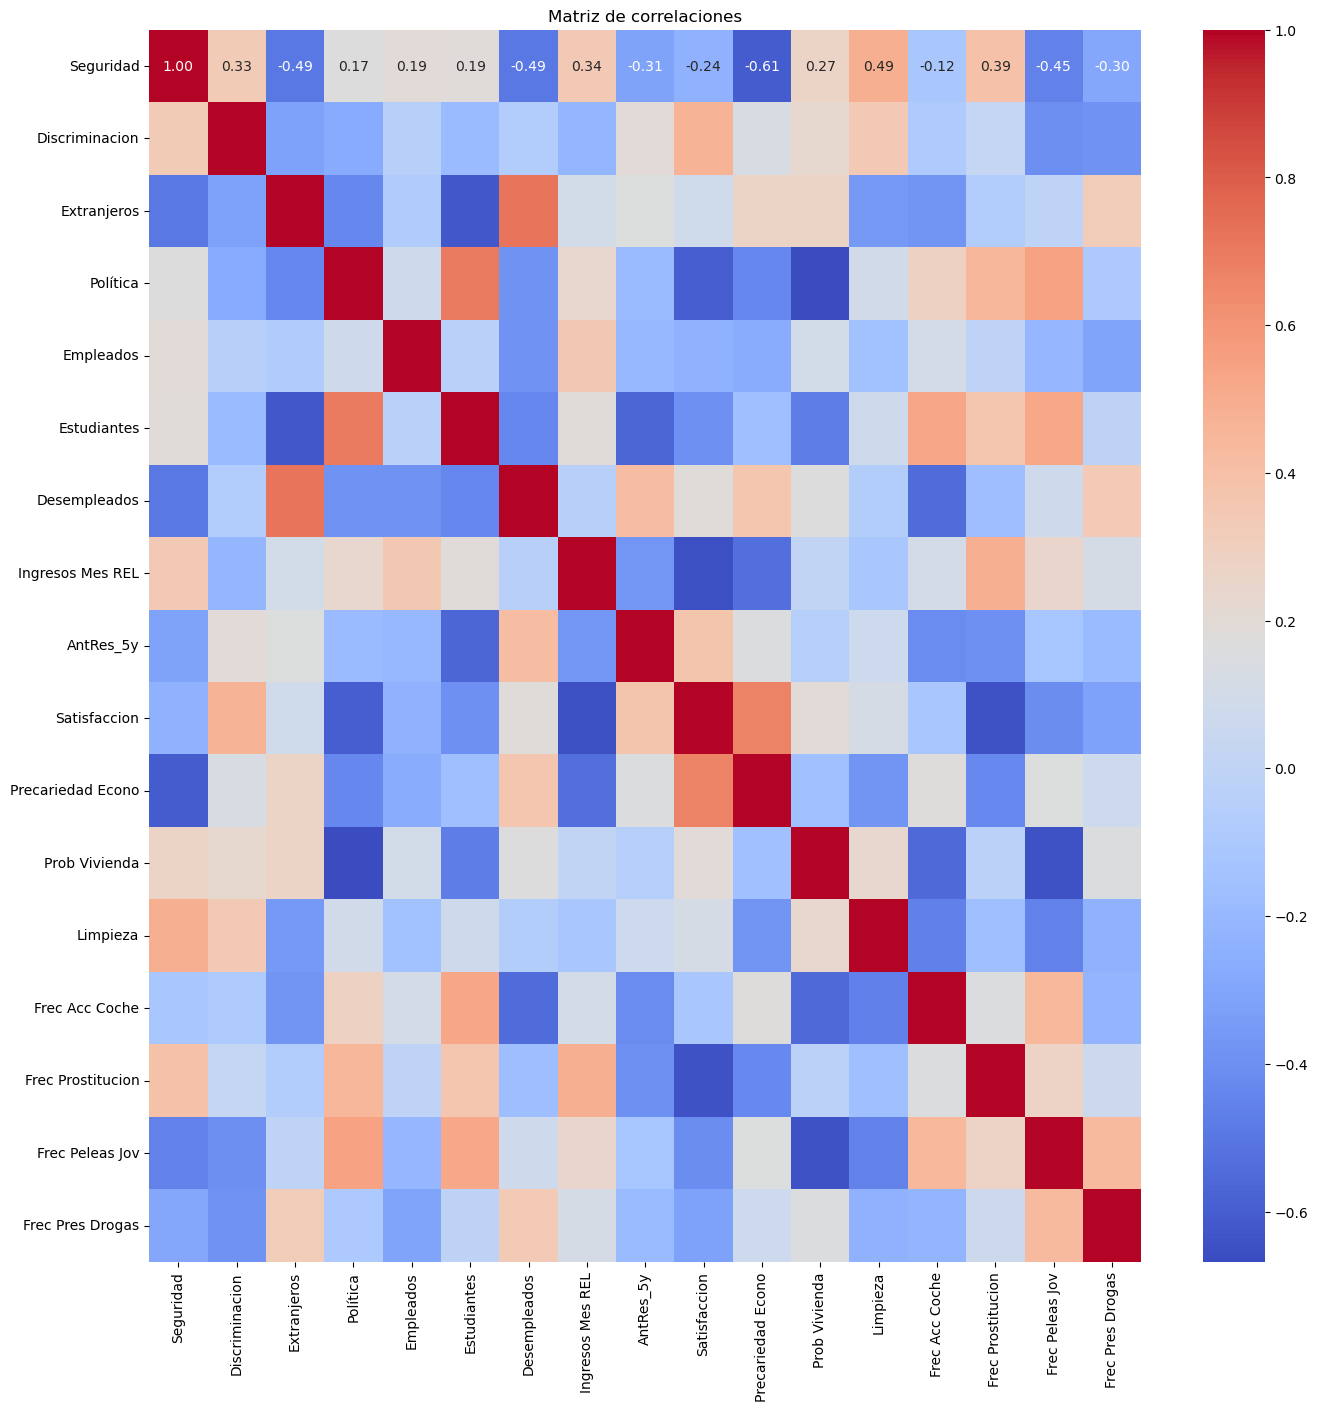

In [25]:

# 3. Visualizaciones

# Matriz de correlaciones
plt.figure(figsize=(16, 16))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlaciones')
plt.show()


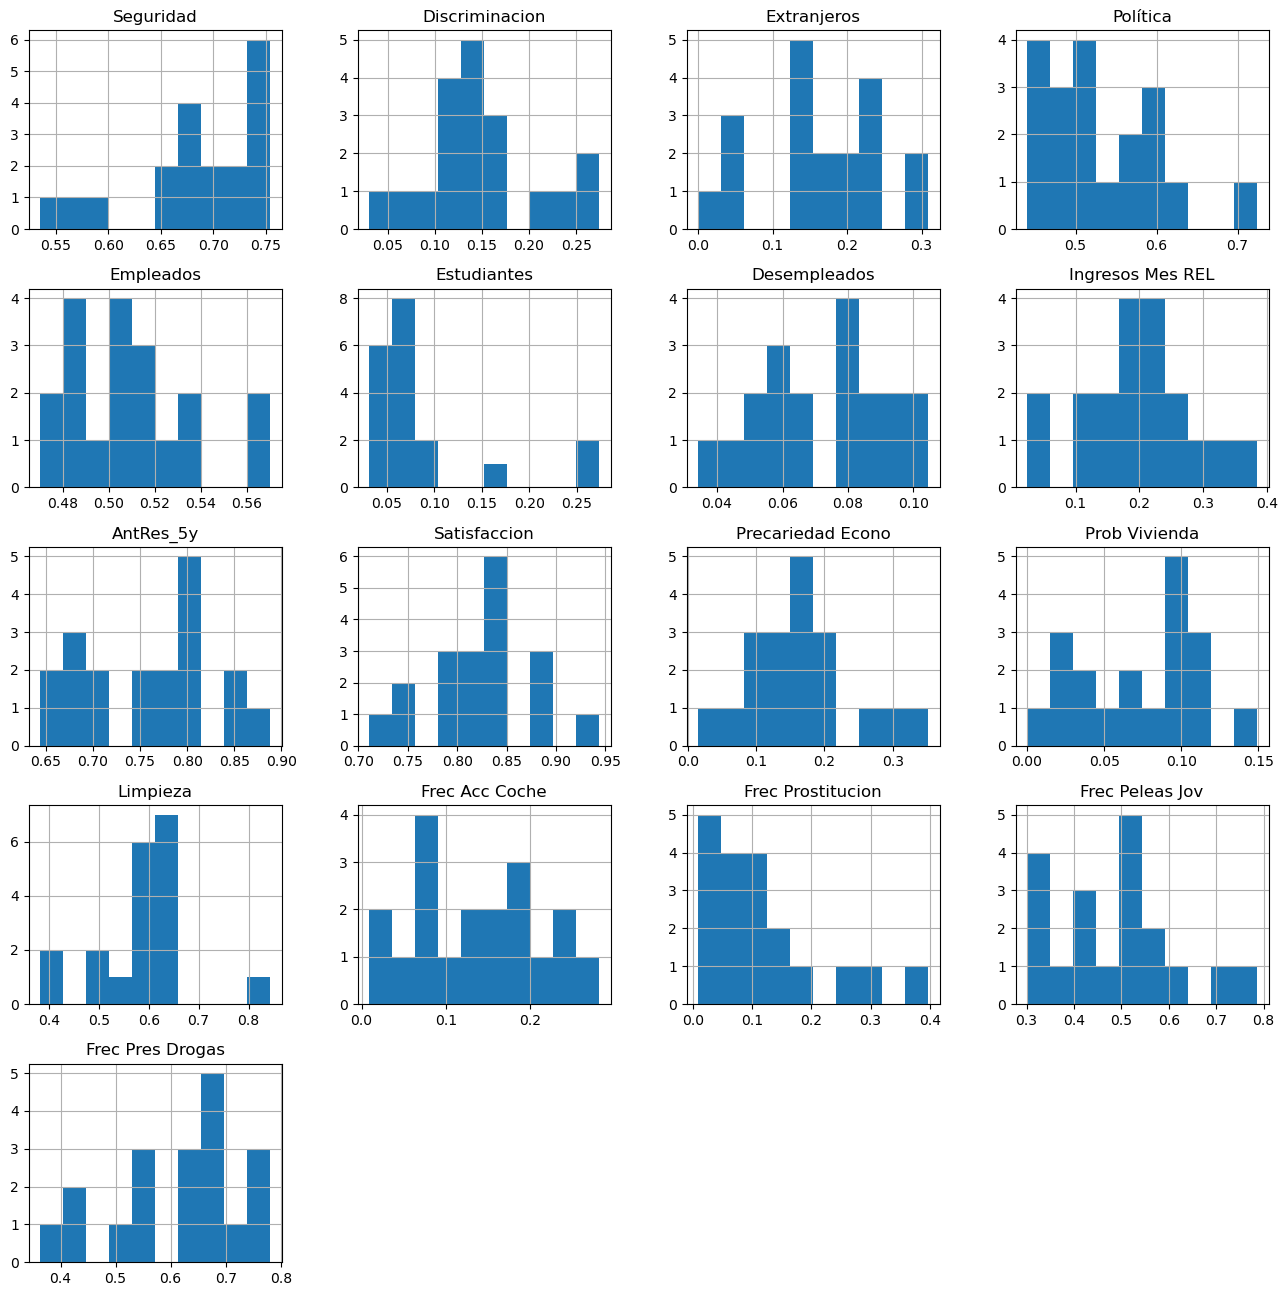

In [26]:

# Histogramas
df.hist(figsize=(16, 16))
plt.show()


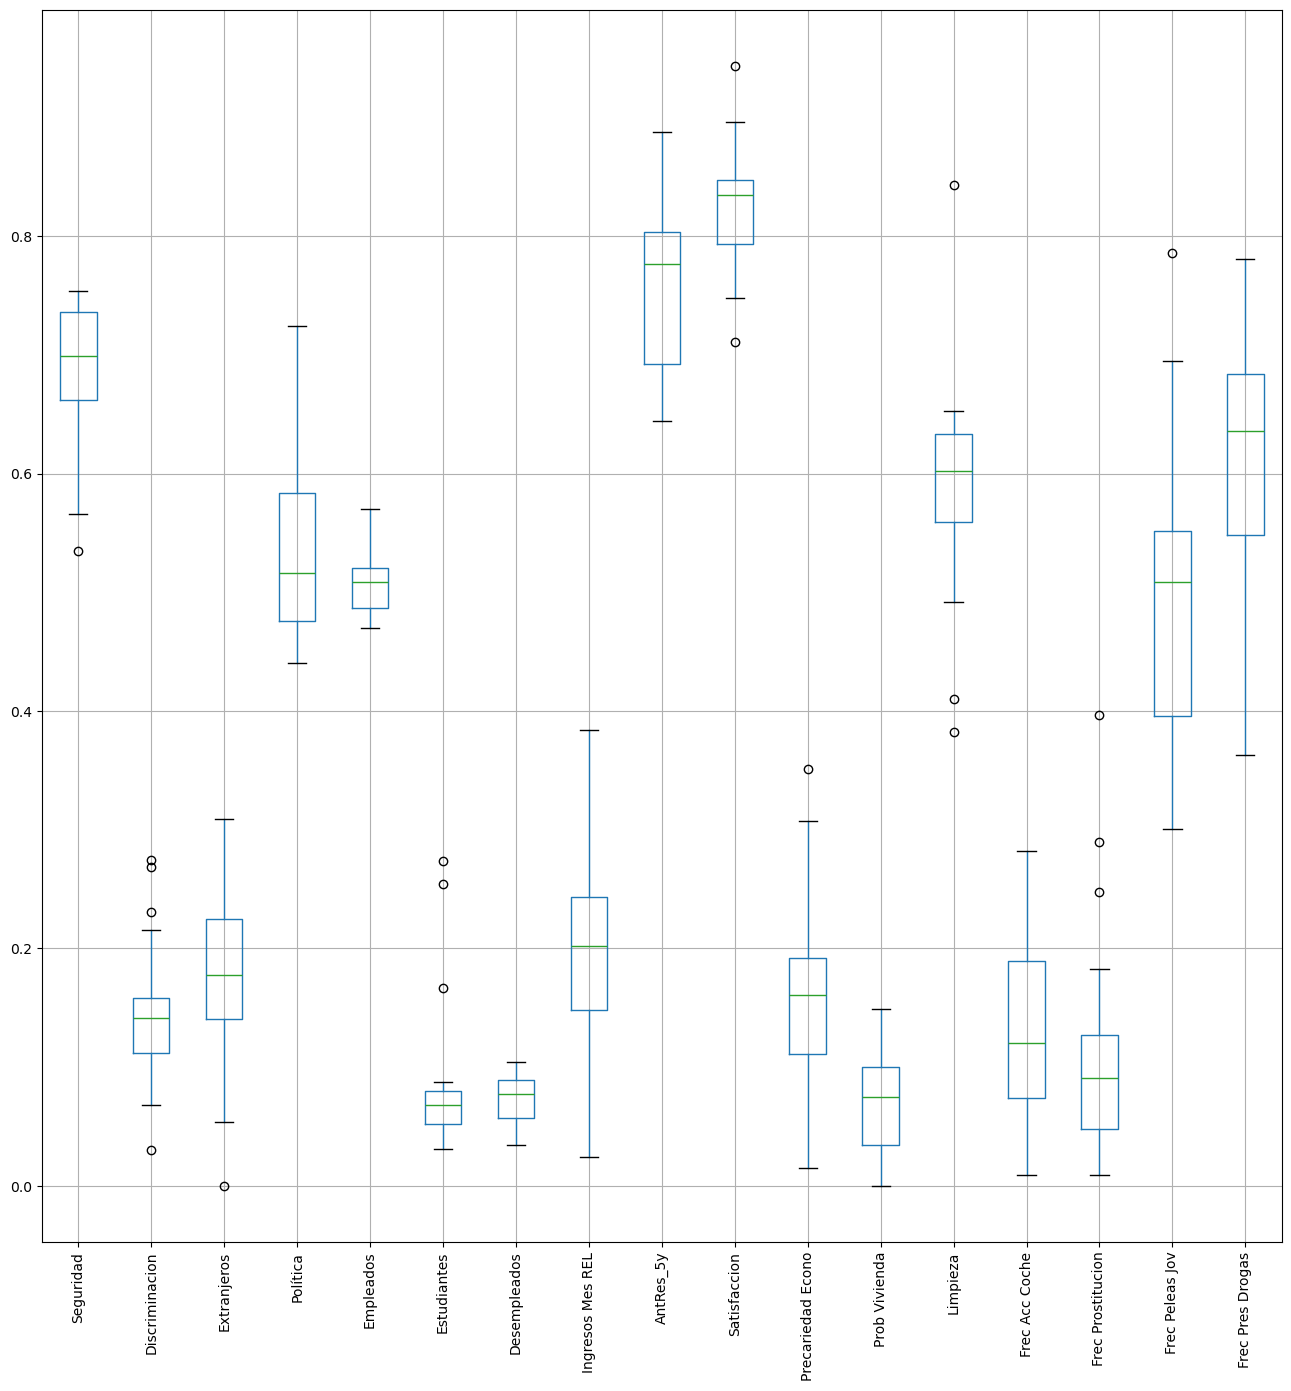

In [27]:

# Boxplots
df.boxplot(figsize=(16, 16))
#girar las etiquetas 90 grados
plt.xticks(rotation=90)
plt.show()


c:\Users\Carlo\anaconda3\envs\NLP_3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Carlo\anaconda3\envs\NLP_3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Carlo\anaconda3\envs\NLP_3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Carlo\anaconda3\envs\NLP_3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

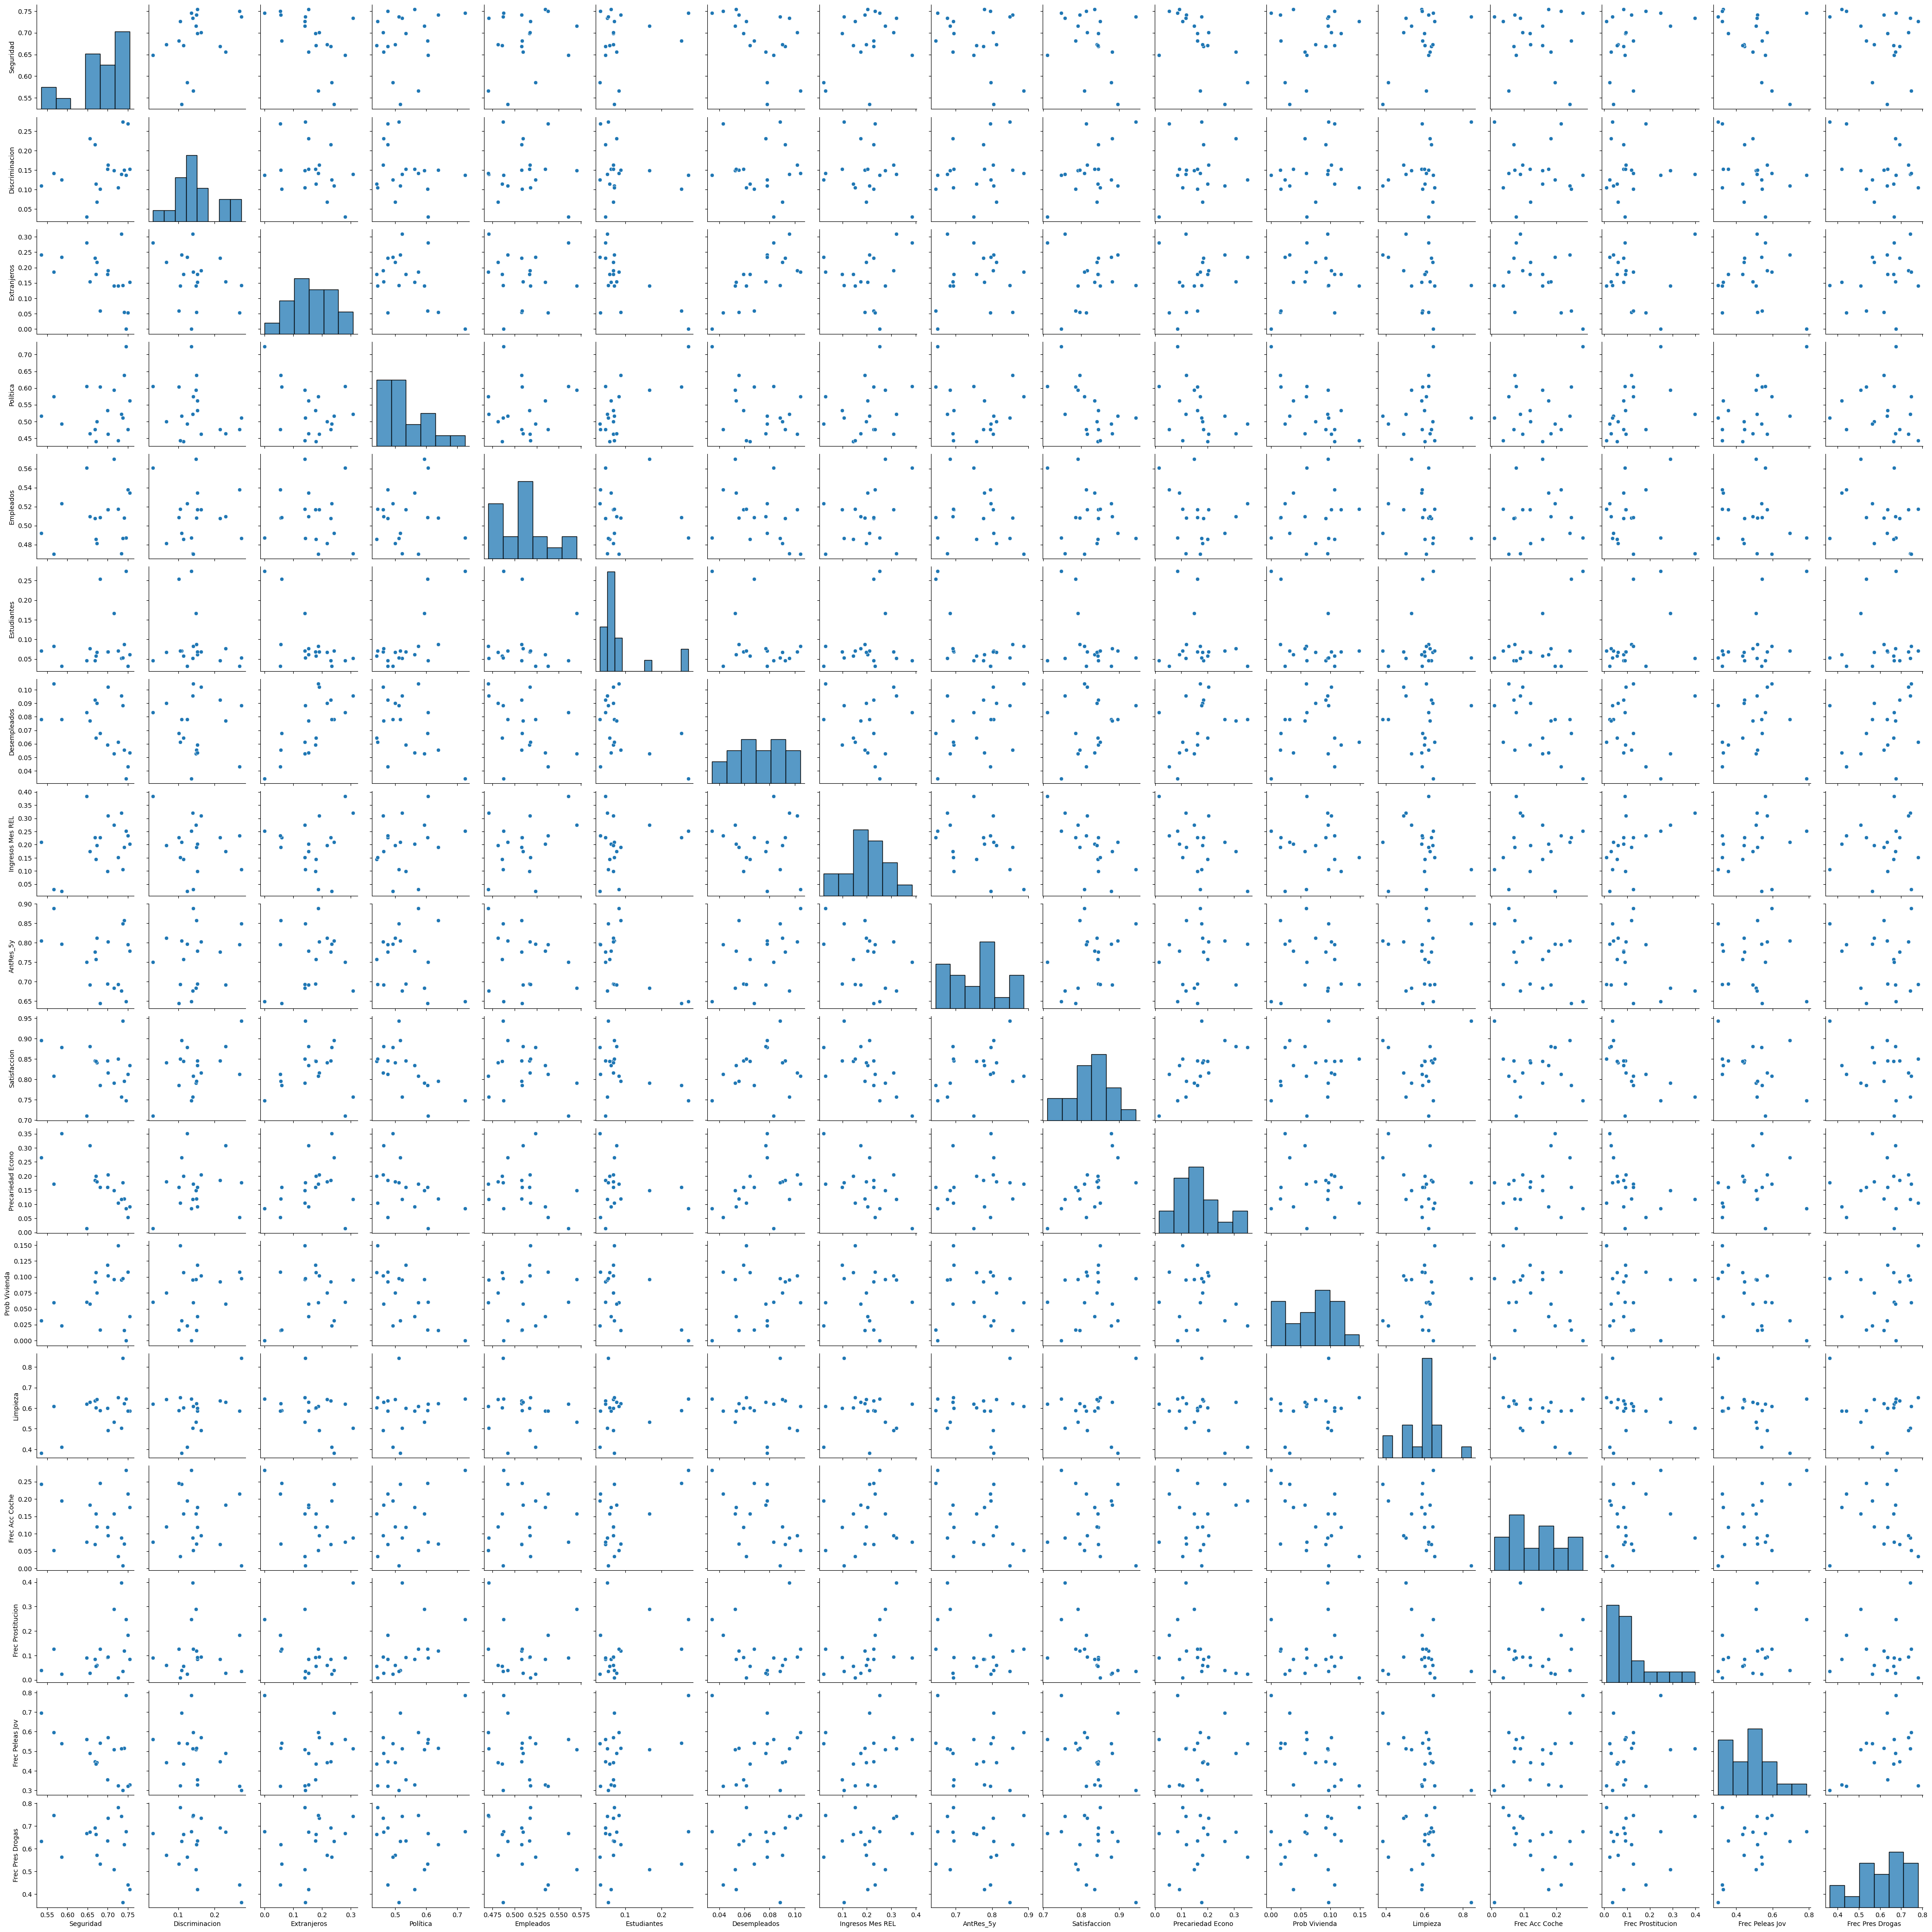

In [28]:

# Scatter plots
sns.pairplot(df)
plt.show()



In [29]:
# A df le hacemos una copia, le hacemos PCA y representamos las 3 primeros componentes

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



df_cluster = df_copy.copy()


# Normalizamos los datos
scaler = StandardScaler()
scaler.fit(df_cluster)
df_scaled = scaler.transform(df_cluster)



# Aplicamos PCA de forma que nos quedemos con un 85% de la varianza explicada
pca = PCA(n_components=0.85)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)



In [30]:

# Representamos los datos en 3D (debe poder girarse, usaremos plotly). Cada punto debe mostrar su nombre (distrito)
import plotly.express as px
#cambiamos el tamaño del plot a 10x10
fig = px.scatter_3d(x=df_pca[:, 0], y=df_pca[:, 1], z=df_pca[:, 2], text=df['Distrito'], width=1000, height=1000)

fig.show()


c:\Users\Carlo\anaconda3\envs\NLP_3.10\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Carlo\anaconda3\envs\NLP_3.10\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\Carlo\anaconda3\envs\NLP_3.10\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Carlo\anaconda3\envs\NLP_3.10\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting

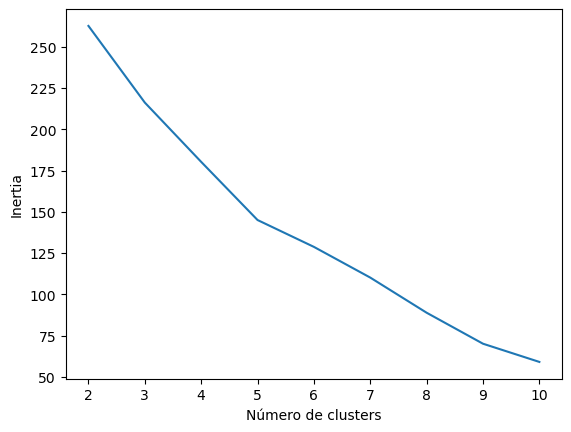

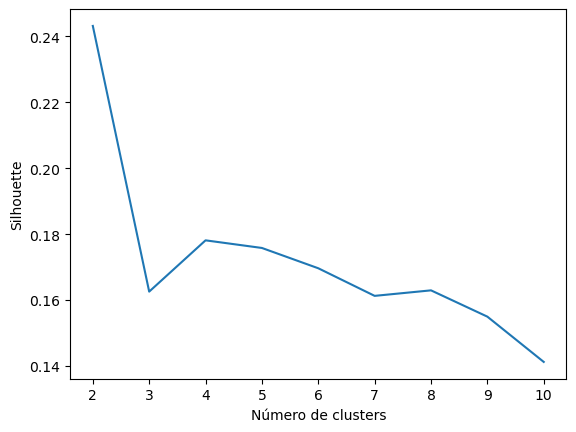

In [31]:
# hacemos un clustering con kmeans y representamos los clusters en 3D. No sabemos cuántos clusters hay. usaremos el método del codo para averiguarlo

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Vamos a probar con un número de clusters entre 2 y 10
n_clusters = range(2, 11)
inertia = []
silhouette = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(df_scaled, kmeans.labels_))

plt.plot(n_clusters, inertia)
plt.xlabel('Número de clusters')
plt.ylabel('Inertia')
plt.show()

plt.plot(n_clusters, silhouette)
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette')
plt.show()


In [32]:
# Vemos que el número óptimo de clusters es 5

kmeans = KMeans(n_clusters=7)
kmeans.fit(df_scaled)
df['Cluster'] = kmeans.labels_

df

# Representamos los datos en 3D (debe poder girarse, usaremos plotly). Cada punto debe mostrar su nombre (distrito) y su cluster

fig = px.scatter_3d(x=df_pca[:, 0], y=df_pca[:, 1], z=df_pca[:, 2], text=df['Distrito'], color=df['Cluster'], width=1000, height=1000)

fig.show()


c:\Users\Carlo\anaconda3\envs\NLP_3.10\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Carlo\anaconda3\envs\NLP_3.10\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [33]:
# cargar en un dataframe el documento distritosAyuntamiento_2023.csv
df_jesus = pd.read_csv('distritosAyuntamiento_2023.csv')
# Los valores de la columna ´Distrito´ son de tipo string. Los ponemos en minúsculas y sin tildes. Eliminamos los números y los puntos
df_jesus['Distrito'] = df_jesus['Distrito'].str.lower()
df_jesus['Distrito'] = df_jesus['Distrito'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
# modifica cada string de la columna 'Distrito' para que empiece por el número de la posición en la lista y un espacio. Debe empezar en 1
df_jesus['Distrito'] = df_jesus['Distrito'].str.replace('. ', ' ')
df_jesus['Distrito'] = df_jesus['Distrito'].str.replace(' ', '_')
#cambiar las "_" por " " en los string de Distrito
df_jesus['Distrito'] = df_jesus['Distrito'].str.replace('_', ' ')

#indexar desde valor 1 en todas las filas
df_jesus.index = np.arange(1, len(df_jesus) + 1)

df_jesus




,Distrito,Código distrito,Personas,Superficie (hm²),Densidad de población (p / hm²),Porcentaje +65 años,Edad media,Índice de envejecimiento,Índice de sobreenvejecimiento,Índice de estructura de la población activa,...,Tasa bruta de mortalidad,Tasa bruta de emigración intraurbana,Tasa bruta de emigración interurbana,Tasa general de fecundidad,Período de mayor construcción de inmuebles,Sup. construida media (m²),Valor catastral máxima frecuencia (miles euros),Valor por m²,Coeficiente derecha - izquierda,ClaseBoW
1,ciutat vella,1,28763.0,168.985,170.210374,20.165658,44.566667,171.683333,17.200000,117.116667,...,103.816667,11.416667,55.166667,45.966667,1935.833333,122.777660,73.666667,504.081523,1.963074,suburbano
2,l'eixample,2,43565.0,173.319,251.357324,23.970437,45.833333,170.233333,19.400000,134.800000,...,60.633333,10.000000,45.266667,27.900000,1943.333333,140.623032,67.333333,616.036472,3.802905,suburbano
3,extramurs,3,49335.0,197.169,250.216819,22.191162,45.475000,175.200000,19.375000,127.600000,...,75.600000,10.225000,51.025000,35.075000,1920.000000,113.403003,80.000000,491.626363,1.423521,turístico
4,campanar,4,39846.0,523.778,76.074215,23.489702,45.400000,183.200000,14.625000,137.125000,...,63.375000,7.925000,43.525000,38.125000,1978.750000,106.183619,44.000000,442.062998,1.117609,familiar
5,la saidia,5,47499.0,194.391,244.347732,23.198932,45.880000,185.780000,17.620000,127.160000,...,63.360000,11.200000,45.440000,34.700000,1970.000000,100.438590,32.400000,372.342184,0.958173,turístico
6,el pla del real,6,30680.0,169.296,181.221057,24.461370,44.450000,154.400000,16.425000,108.925000,...,54.300000,9.700000,46.675000,28.350000,1975.000000,138.111878,73.500000,638.134024,3.388603,suburbano
7,l'olivereta,7,49584.0,198.880,249.316171,21.063360,44.820000,165.140000,18.880000,126.760000,...,75.260000,11.280000,39.680000,48.120000,1970.000000,94.573562,26.400000,339.068317,0.955987,comercial
8,patraix,8,58333.0,287.264,203.064080,21.432930,45.400000,175.420000,12.540000,144.480000,...,45.040000,8.100000,36.420000,29.820000,1970.000000,109.470099,44.400000,412.463723,0.945001,suburbano
9,jesus,9,52585.0,298.461,176.187174,20.824373,44.940000,167.380000,13.500000,142.620000,...,55.840000,9.700000,37.940000,33.740000,1970.000000,102.079126,40.200000,362.409969,0.954247,turístico
10,quatre carreres,10,76572.0,1132.522,67.611932,19.966008,44.128571,143.157143,15.500000,136.814286,...,65.671429,9.614286,40.571429,33.085714,1977.857143,112.564585,46.428571,385.316458,1.239696,suburbano


In [34]:
# junta los dos dataframes por orden de filas
df_conjunto = pd.concat([df, df_jesus], axis=1)

#quitar la última columna de df_conjunto
df_conjunto = df_conjunto.iloc[:, :-1]
#eliminar las columnas 19, 20, y 21

df_conjunto = df_conjunto.drop(df_conjunto.columns[18:21], axis=1)

df_conjunto

,Seguridad,Discriminacion,Extranjeros,Política,Empleados,Estudiantes,Desempleados,Ingresos Mes REL,AntRes_5y,Satisfaccion,...,Tasa bruta de natalidad,Tasa bruta de mortalidad,Tasa bruta de emigración intraurbana,Tasa bruta de emigración interurbana,Tasa general de fecundidad,Período de mayor construcción de inmuebles,Sup. construida media (m²),Valor catastral máxima frecuencia (miles euros),Valor por m²,Coeficiente derecha - izquierda
1,0.715789,0.149123,0.140351,0.593814,0.570175,0.166667,0.052632,0.274123,0.684211,0.791228,...,45.600000,103.816667,11.416667,55.166667,45.966667,1935.833333,122.777660,73.666667,504.081523,1.963074
2,0.741270,0.150794,0.055556,0.638938,0.507937,0.087302,0.055556,0.190873,0.857143,0.796032,...,40.566667,60.633333,10.000000,45.266667,27.900000,1943.333333,140.623032,67.333333,616.036472,3.802905
3,0.754198,0.152672,0.152672,0.562037,0.534351,0.061069,0.053435,0.202290,0.778626,0.835115,...,43.525000,75.600000,10.225000,51.025000,35.075000,1920.000000,113.403003,80.000000,491.626363,1.423521
4,0.699153,0.152542,0.177966,0.533708,0.516949,0.067797,0.059322,0.099364,0.694915,0.845763,...,43.700000,63.375000,7.925000,43.525000,38.125000,1978.750000,106.183619,44.000000,442.062998,1.117609
5,0.535156,0.109375,0.242188,0.516071,0.492188,0.070312,0.078125,0.210000,0.804688,0.896094,...,42.440000,63.360000,11.200000,45.440000,34.700000,1970.000000,100.438590,32.400000,372.342184,0.958173
6,0.745299,0.136752,0.000000,0.724138,0.487179,0.273504,0.034188,0.252564,0.649573,0.747863,...,40.750000,54.300000,9.700000,46.675000,28.350000,1975.000000,138.111878,73.500000,638.134024,3.388603
7,0.668462,0.215385,0.230769,0.476106,0.507692,0.046154,0.092308,0.227500,0.776923,0.845385,...,44.760000,75.260000,11.280000,39.680000,48.120000,1970.000000,94.573562,26.400000,339.068317,0.955987
8,0.734559,0.139706,0.308824,0.521774,0.470588,0.051471,0.095588,0.320037,0.676471,0.757353,...,42.140000,45.040000,8.100000,36.420000,29.820000,1970.000000,109.470099,44.400000,412.463723,0.945001
9,0.672932,0.067669,0.218045,0.500000,0.481203,0.067669,0.090226,0.197932,0.812030,0.841353,...,40.900000,55.840000,9.700000,37.940000,33.740000,1970.000000,102.079126,40.200000,362.409969,0.954247
10,0.700680,0.163265,0.190476,0.462069,0.517007,0.068027,0.102041,0.309354,0.802721,0.816327,...,52.971429,65.671429,9.614286,40.571429,33.085714,1977.857143,112.564585,46.428571,385.316458,1.239696


In [35]:

df_completo = df_conjunto.copy()



In [36]:

# Normalizamos los datos
scaler = StandardScaler()
scaler.fit(df_completo)
df_scaled_completo = scaler.transform(df_completo)

In [37]:
pca_completo = PCA(n_components=0.80)
pca_completo.fit(df_scaled_completo)
df_pca_completo = pca_completo.transform(df_scaled_completo)

In [38]:
fig = px.scatter_3d(x=df_pca_completo[:, 0], y=df_pca_completo[:, 1], z=df_pca_completo[:, 2], text=df['Distrito'], width=1000, height=1000)

fig.show()


In [39]:
import random



In [40]:
# Vemos que el número óptimo de clusters es 5

kmeans = KMeans(n_clusters=5)
kmeans.fit(df_scaled_completo)
df['Cluster'] = kmeans.labels_

# vamos a añadir la columna cluster al dataframe df_completo
df_completo['Cluster'] = kmeans.labels_
# la etiquta 0 va a ser "turístico"
# la etiqueta 1 va a ser "multicultural"
# la etiqueta 2 va a ser "comercial"
# la etiqueta 3 va a ser "familiar"
# la etiqueta 4 va a ser "histórico"
df_completo['Cluster_color'] = df_completo['Cluster'].map({0: 'turístico', 1: 'multicultural', 2: 'comercial', 3: 'familiar', 4: 'histórico'})


# Representamos los datos en 3D (debe poder girarse, usaremos plotly). Cada punto debe mostrar su nombre (distrito) y su cluster

fig = px.scatter_3d(x=df_pca_completo[:, 0], y=df_pca_completo[:, 1], z=df_pca_completo[:, 2], text=df['Distrito'], color=df_completo['Cluster_color'], width=1000, height=1000)


fig.show()


# JESUS, DE AQUÍ LA FIGURA DE LA PRESENTACIÓN // BENNET 

c:\Users\Carlo\anaconda3\envs\NLP_3.10\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Carlo\anaconda3\envs\NLP_3.10\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [41]:
# cargar en un dataframe el documento mostSimilarDf_5zero.csv
df_similar = pd.read_csv('mostSimilarDf_5zero.csv')

df_similar
#permuta la fila 16 con la fila 17
df_similar.iloc[[16, 17]] = df_similar.iloc[[17, 16]]
#elimina la última fila
df_similar = df_similar.iloc[:-1]
#eliminamos la todas las columnas salvo la primera y la última
df_similar = df_similar.drop(df_similar.columns[1:-1], axis=1)
#eliminamos todos los caracteres que aparezcan despues de un espacio en la primera columna (zero-shot-classification)
df_similar['zero-shot-classification'] = df_similar['zero-shot-classification'].str.split(' ').str[0]


#eliminamos la ul
df_similar

,Unnamed: 0,zero-shot-classification
0,Ciutat Vella,turístico
1,L´Eixample,multicultural
2,Extramurs,familiar
3,Campanar,comercial
4,La Zaidia,familiar
5,El Pla del Real,histórico
6,L’Olivereta,turístico
7,Patraix,multicultural
8,Jesús,multicultural
9,Quatre Carreres,comercial


In [42]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_scaled_completo)
df['Cluster'] = kmeans.labels_

# Representamos los datos en 3D (debe poder girarse, usaremos plotly). Cada punto debe mostrar su nombre (distrito) y su cluster

fig = px.scatter_3d(x=df_pca_completo[:, 0], y=df_pca_completo[:, 1], z=df_pca_completo[:, 2], text=df['Distrito'], color=df_similar['zero-shot-classification'], width=1000, height=1000)

fig.show()

c:\Users\Carlo\anaconda3\envs\NLP_3.10\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Carlo\anaconda3\envs\NLP_3.10\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



[Text(0.6, 0.9166666666666666, 'Extranjeros <= 0.153\ngini = 0.56\nsamples = 19\nvalue = [2, 1, 1, 12, 3]\nclass = multicultural'),
 Text(0.4, 0.75, 'Período de mayor construcción de inmuebles <= 1952.024\ngini = 0.75\nsamples = 8\nvalue = [2, 1, 1, 1, 3]\nclass = turístico'),
 Text(0.2, 0.5833333333333334, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0, 0, 3]\nclass = turístico'),
 Text(0.6, 0.5833333333333334, 'Valor catastral máxima frecuencia (miles euros) <= 45.3\ngini = 0.72\nsamples = 5\nvalue = [2, 1, 1, 1, 0]\nclass = comercial'),
 Text(0.4, 0.4166666666666667, 'Porcentaje de población extranjera <= 10.1\ngini = 0.667\nsamples = 3\nvalue = [0, 1, 1, 1, 0]\nclass = familiar'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0]\nclass = familiar'),
 Text(0.6, 0.25, 'Índice de estructura de la población activa <= 132.281\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 1, 1, 0]\nclass = histórico'),
 Text(0.4, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1

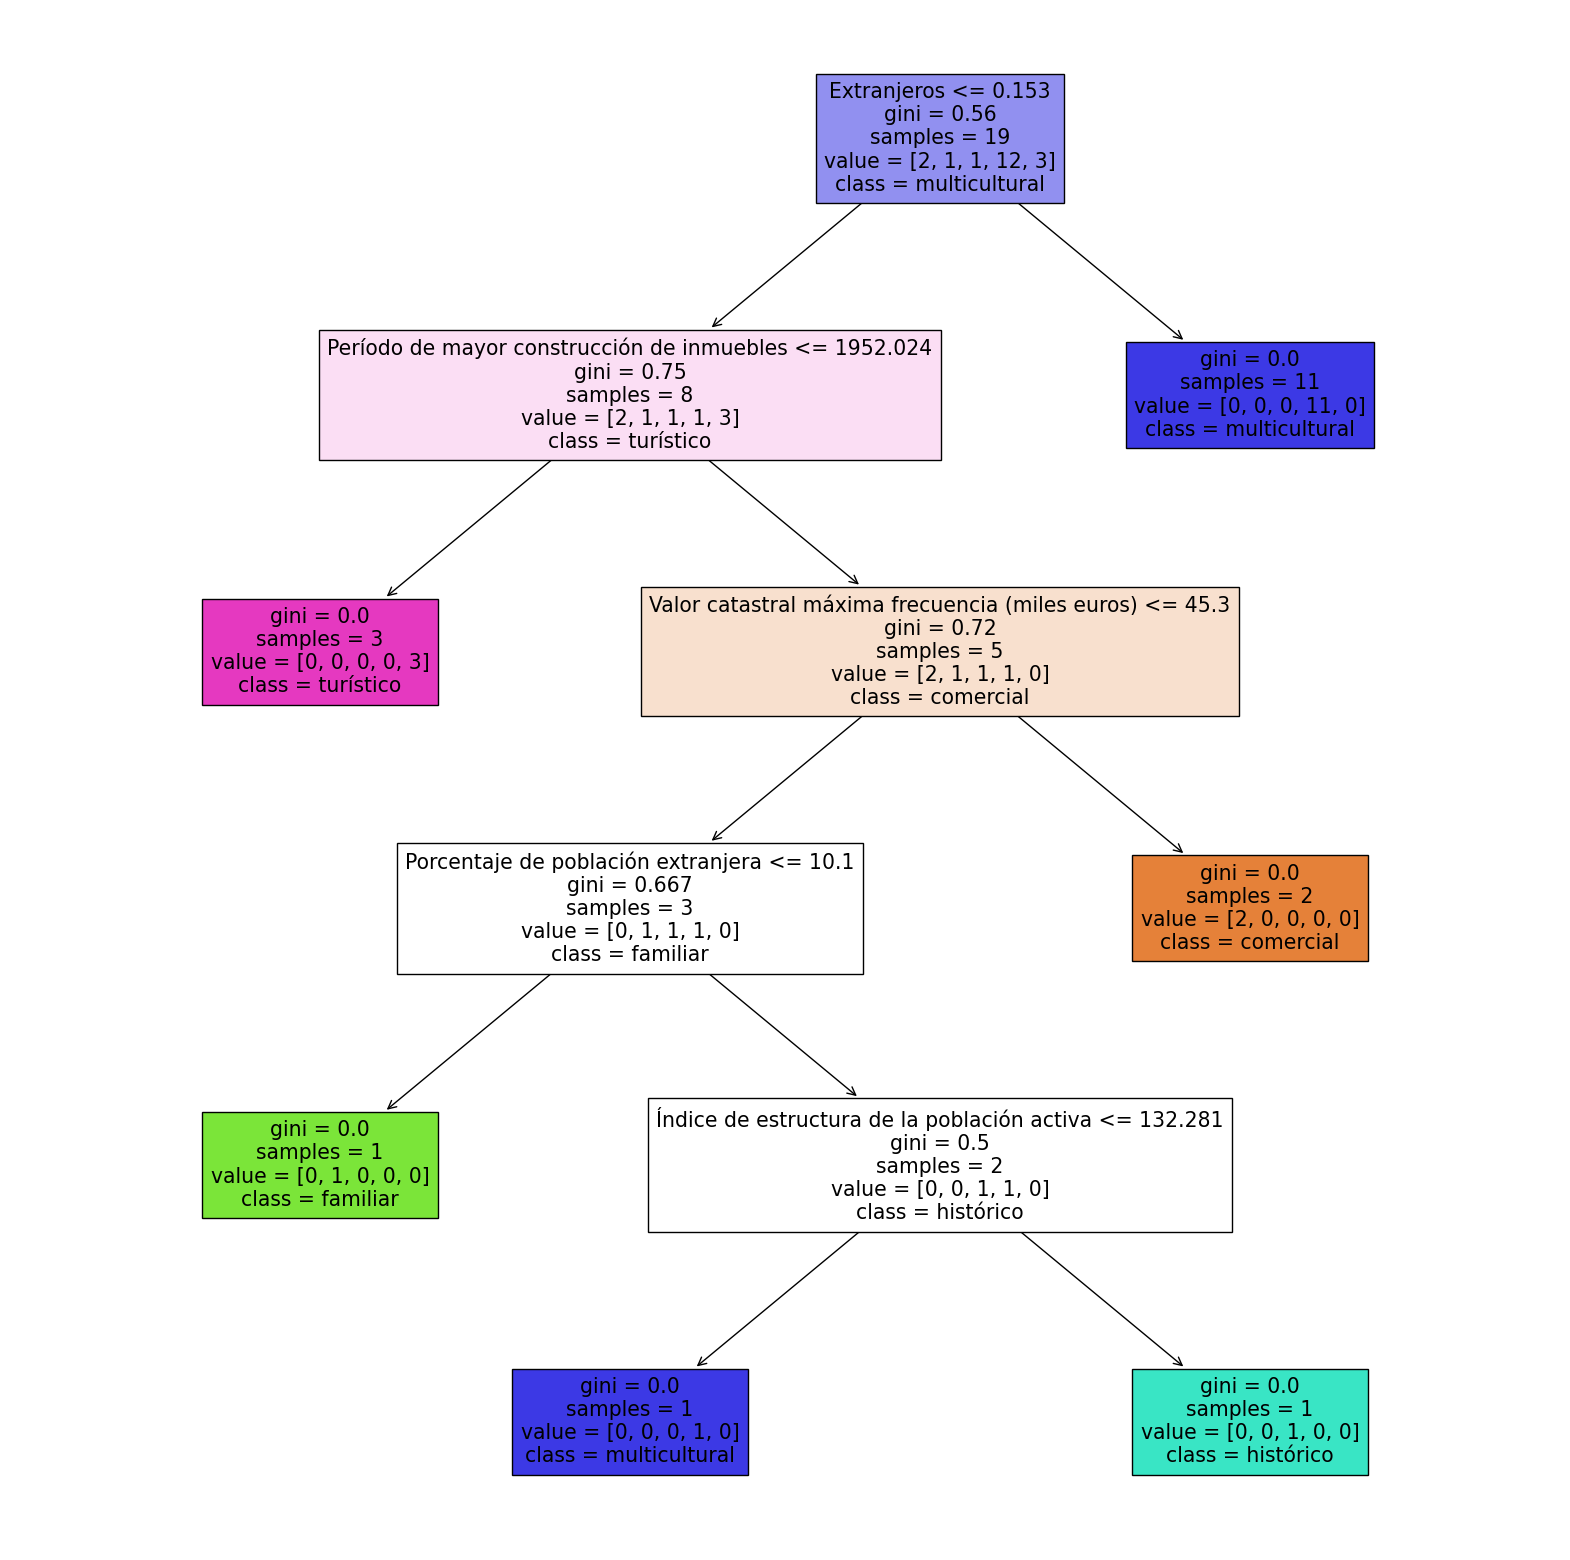

In [81]:
#usa t-sne para reducir la dimensionalidad de df_scaled_completo a 3 dimensiones. colorea por df_similar['zero-shot-classification']
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, perplexity=10)
df_tsne = tsne.fit_transform(df_scaled_completo)

fig = px.scatter_3d(x=df_tsne[:, 0], y=df_tsne[:, 1], z=df_tsne[:, 2], text=df['Distrito'], color=df_similar['zero-shot-classification'], width=1000, height=1000)

fig.show()



In [ ]:
#añadimos la columna zero-shot-classification al 

In [ ]:
# Poner nombres a los clusters de colores (nueva columna)
# Cluster 0: "Turisticos"
# Cluster 1: "Multicultural"
# Cluster 2: "Familiar"
# Cluster 3: "Comercial/Universitario"
# Cluster 4: "Residencial"

df['Cluster Name'] = df['Cluster'].map({1: 'Turisticos', 3: 'Multicultural', 2: 'Familiar', 0: 'Comercial/Universitario', 4: 'Residencial'})


df

# multicultural, histórico, turístico, familiar, comercial
#

,Distrito,Seguridad,Discriminacion,Convivencia,Extranjeros,Política,Empleados,Estudiantes,Desempleados,Ingresos Mes,...,Satisfaccion,Precariedad Econo,Prob Vivienda,Limpieza,Frec Acc Coche,Frec Prostitucion,Frec Peleas Jov,Frec Pres Drogas,Cluster,Cluster Name
0,Total,0.675763,0.135579,0.675763,0.183847,0.534791,0.506947,0.081897,0.077091,1875.070412,...,0.821059,0.166817,0.070282,0.573540,0.129150,0.115051,0.503282,0.634716,1,Turisticos
1,1. Ciutat Vella,0.715789,0.149123,0.715789,0.140351,0.593814,0.570175,0.166667,0.052632,2741.228070,...,0.791228,0.149123,0.096491,0.531579,0.157895,0.289474,0.508772,0.508772,3,Multicultural
2,2. l'Eixample,0.741270,0.150794,0.741270,0.055556,0.638938,0.507937,0.087302,0.055556,1908.730159,...,0.796032,0.119048,0.015873,0.622222,0.071429,0.119048,0.515873,0.619048,1,Turisticos
3,3. Extramurs,0.754198,0.152672,0.754198,0.152672,0.562037,0.534351,0.061069,0.053435,2022.900763,...,0.835115,0.091603,0.038168,0.586260,0.175573,0.083969,0.328244,0.419847,3,Multicultural
4,4. Campanar,0.699153,0.152542,0.699153,0.177966,0.533708,0.516949,0.067797,0.059322,993.644068,...,0.845763,0.161017,0.118644,0.599153,0.118644,0.093220,0.355932,0.635593,1,Turisticos
5,5. la Saïdia,0.535156,0.109375,0.535156,0.242188,0.516071,0.492188,0.070312,0.078125,0.000000,...,0.896094,0.265625,0.031250,0.382031,0.242188,0.039062,0.695312,0.632812,0,Comercial/Universitario
6,6. el Pla del Real,0.745299,0.136752,0.745299,0.000000,0.724138,0.487179,0.273504,0.034188,2525.641026,...,0.747863,0.085470,0.000000,0.644444,0.282051,0.247863,0.786325,0.675214,2,Familiar
7,7. l'Olivereta,0.668462,0.215385,0.668462,0.230769,0.476106,0.507692,0.046154,0.092308,2275.000000,...,0.845385,0.184615,0.092308,0.636923,0.069231,0.084615,0.446154,0.692308,1,Turisticos
8,8. Patraix,0.734559,0.139706,0.734559,0.308824,0.521774,0.470588,0.051471,0.095588,3200.367647,...,0.757353,0.117647,0.095588,0.503676,0.088235,0.397059,0.514706,0.742647,1,Turisticos
9,9. Jesús,0.672932,0.067669,0.672932,0.218045,0.500000,0.481203,0.067669,0.090226,1979.323308,...,0.841353,0.180451,0.075188,0.642105,0.120301,0.060150,0.443609,0.571429,1,Turisticos


In [ ]:
# hacer el plot con los nombres de los grupos

fig = px.scatter_3d(x=df_pca[:, 0], y=df_pca[:, 1], z=df_pca[:, 2], text=df['Distrito'], color=df['Cluster Name'], width=1000, height=700)

fig.show()



In [ ]:
# vamos a repetir este proceso haciendo esta vez una PCA para dos componentes principales y representando los datos en 2D

pca = PCA(n_components=2)
pca.fit(df_scaled)

df_pca = pca.transform(df_scaled)

fig = px.scatter(x=df_pca[:, 0], y=df_pca[:, 1], text=df['Distrito'], color=df['Cluster Name'])

fig.show()



